In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
# Load data
data = pd.read_csv('cluster_data1.csv', header=None)
data

,0,1,2,3
0,X1,X2,X3,X4
1,6.7,3,5,1.7
2,6.3,2.9,5.6,1.8
3,5.6,3,4.5,1.5
4,7.6,3,6.6,2.1
...,...,...,...,...
146,5.4,3.9,1.3,0.4
147,5.3,3.7,1.5,0.2
148,6.1,2.6,5.6,1.4
149,5.7,3.8,1.7,0.3


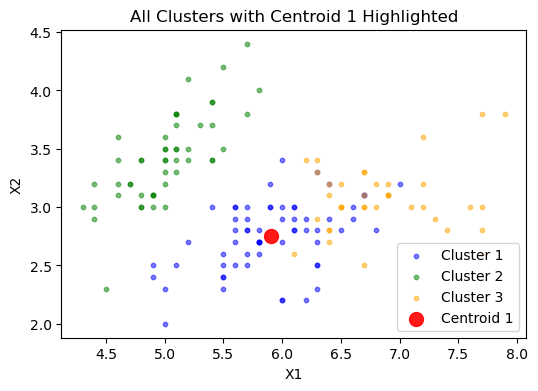

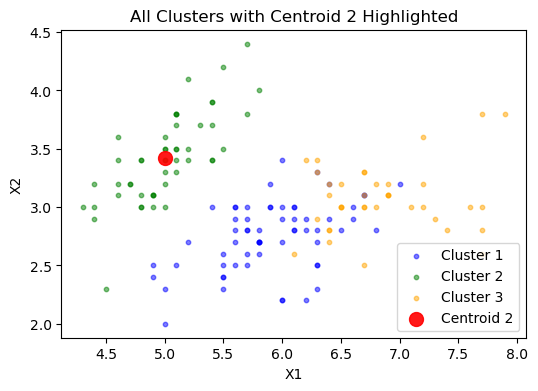

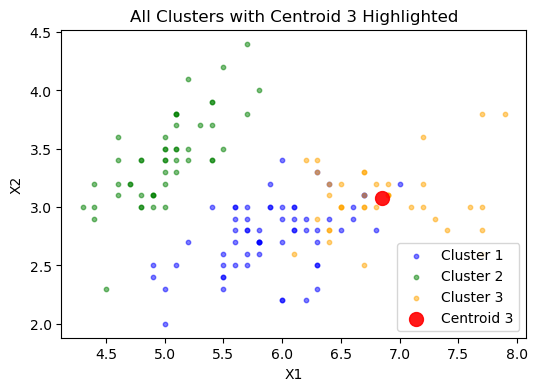

In [35]:
def initialize_centroids_kmeans_plusplus(X, k):
    rng = np.random.default_rng()
    n_samples, n_features = X.shape

    # Choose the first centroid randomly
    centroids = [X[rng.choice(n_samples)]]

    for _ in range(1, k):
        distances = np.array([min(np.linalg.norm(x - centroid)**2 for centroid in centroids) for x in X])
        probabilities = distances / np.sum(distances)
        cumulative_probabilities = np.cumsum(probabilities)

        r = rng.random()
        for i, p in enumerate(cumulative_probabilities):
            if r < p:
                centroids.append(X[i])
                break

    return np.array(centroids)

def kmeans_assign_clusters(X, centroids):
    distances = np.array([[np.linalg.norm(x - centroid) for centroid in centroids] for x in X])
    return np.argmin(distances, axis=1)

def kmeans_update_centroids(X, clusters, k):
    new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])
    return new_centroids

# Initialize centroids with K-means++
centroids = initialize_centroids_kmeans_plusplus(X, 3)

# Perform a few iterations of K-means to refine centroids
for _ in range(10):  # Number of iterations
    clusters = kmeans_assign_clusters(X, centroids)
    centroids = kmeans_update_centroids(X, clusters, 3)

# Plotting
for i in range(3):
    plt.figure(figsize=(6, 4))
    # Plot points for each cluster
    for cluster_index in range(3):
        plt.scatter(X[clusters == cluster_index, 0], X[clusters == cluster_index, 1], s=10, 
                    c=colors[cluster_index], alpha=0.5, label=f'Cluster {cluster_index + 1}')
    # Highlight the current centroid
    plt.scatter(centroids[i, 0], centroids[i, 1], c='red', s=100, label=f'Centroid {i + 1}', alpha=0.9)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f'All Clusters with Centroid {i + 1} Highlighted')
    plt.legend()
    plt.show()


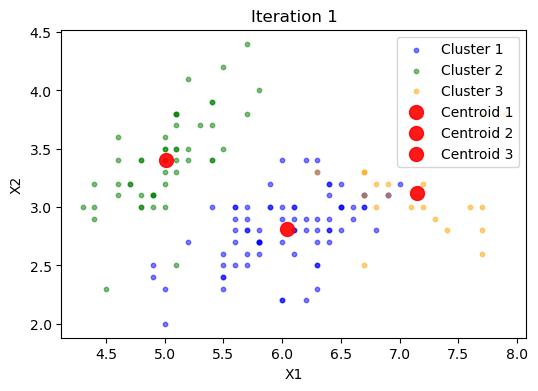

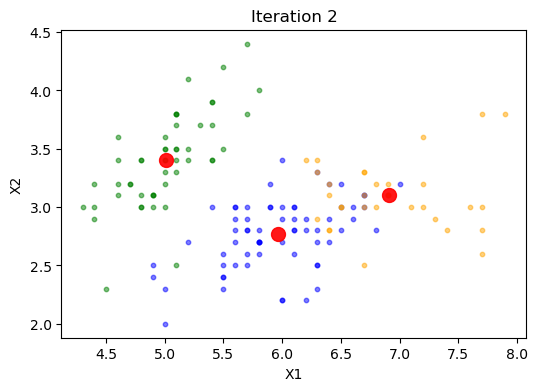

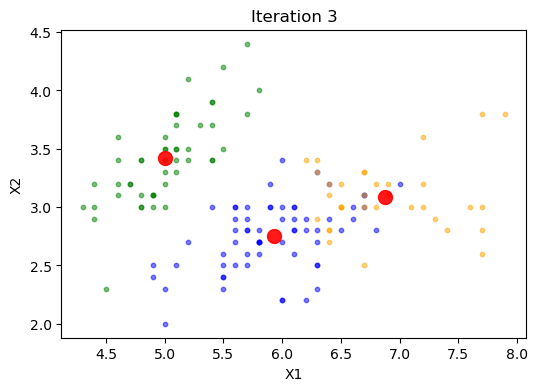

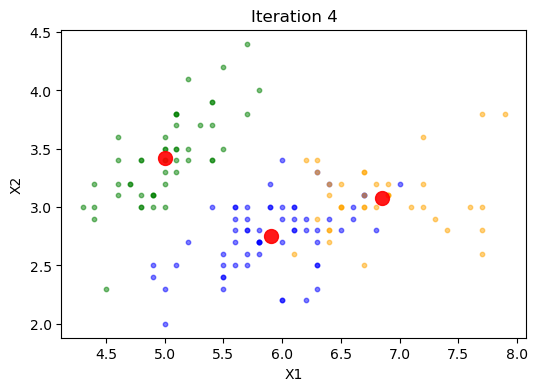

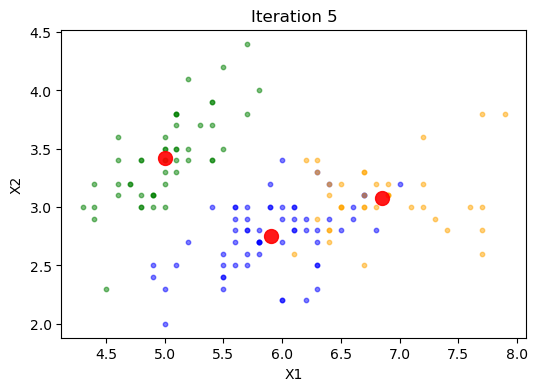

In [30]:
# Initialize centroids for k=3 based on our decision
k_optimal = 3
centroids = initialize_centroids_kmeans_plusplus(X, k_optimal)

# Perform 5 iterations of K-means and plot the progression
for iteration in range(5):
    clusters = kmeans_assign_clusters(X, centroids)
    centroids = kmeans_update_centroids(X, clusters, k_optimal)
    
    # Plotting
    plt.figure(figsize=(6, 4))
    for cluster_index in range(k_optimal):
        cluster_points = X[clusters == cluster_index]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=10, 
                    c=colors[cluster_index], alpha=0.5, label=f'Cluster {cluster_index + 1}')
    for centroid_index, centroid in enumerate(centroids):
        plt.scatter(centroid[0], centroid[1], c='red', s=100, alpha=0.9, label=f'Centroid {centroid_index + 1}' if iteration == 0 else "")
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f'Iteration {iteration + 1}')
    if iteration == 0: plt.legend()
    plt.show()


In [36]:
# Load the new dataset
data2_path = 'cluster_data2.csv'
data2 = pd.read_csv(data2_path)

# Function to predict class for each data point in data2 using K-NN with centroids as training data
def predict_knn(X_train, y_train, X_test, k):
    predictions = []
    for x_test in X_test:
        # Calculate distances from the test point to all centroids
        distances = np.array([np.linalg.norm(x_test - x) for x in X_train])
        # Find the k nearest centroids
        nearest_centroids_indices = distances.argsort()[:k]
        # Predict class by majority vote
        nearest_classes = y_train[nearest_centroids_indices]
        prediction = np.argmax(np.bincount(nearest_classes))
        predictions.append(prediction)
    return predictions

# Assuming centroids from the first part represent classes 0, 1, 2 respectively
classes = np.arange(k_optimal)

# Predict classes for each point in the new dataset
predicted_classes = predict_knn(centroids, classes, data2.values, k=3)

# Add predictions to the dataframe
data2['Class'] = predicted_classes

data2


,X1,X2,X3,X4,Class
0,5.21,3.65,1.42,0.25,0
1,5.07,3.41,1.43,0.19,0
2,5.85,2.65,4.14,1.27,0
3,5.64,2.73,4.03,1.23,0
4,6.55,2.90,5.54,2.05,0
5,5.83,2.75,4.27,1.34,0
6,4.86,3.31,1.45,0.22,0
7,6.63,2.96,5.50,1.93,0
8,5.01,3.39,1.55,0.27,0
9,6.45,3.03,5.33,2.17,0
